In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

In [2]:
data = pd.read_csv('goodreads_clean_final.csv')
data.head()

,user_id,gender,ratings_count,reviews_count,year_joined,young_age,location,friends,fav_genres,groups_count,...,2020,avg_page_20,fav_genres_clean,category,category_simplified,Fiction,"Fiction, Non-fiction",Non-fiction,total_page,challenge_completed
0,1,1,806,34,2014,1,Asia,103,"['Chick-lit', 'Christian', 'Ebooks', 'Fantasy'...",6,...,1,297,"['Romance', 'Religion', 'Fantasy', 'Fiction', ...","Fiction, Non-fiction",1,0,1,0,705,1
1,2,1,822,90,2013,0,USA,225,"['Chick-lit', 'Contemporary', 'Fantasy', 'Fict...",0,...,1,355,"['Romance', 'Fiction', 'Fantasy', 'Fiction', '...","Fiction, Non-fiction",1,0,1,0,1126,3
2,3,1,114,4,2014,1,Asia,7,"['Chick-lit', 'Contemporary', 'Ebooks', 'Roman...",1,...,0,284,"['Romance', 'Fiction', 'Romance', 'Self help',...","Fiction, Non-fiction",1,0,1,0,864,2
3,4,1,1265,630,2015,1,Asia,588,"['Fantasy', 'Historical fiction', 'Manga', 'Yo...",1,...,1,380,"['Fantasy', 'Fiction', 'Comics', 'Young-adult']",Fiction,1,1,0,0,1028,3
4,5,1,380,1,2014,0,EU,56,"['Comics', 'Fantasy', 'Historical fiction', 'H...",1,...,0,278,"['Comics', 'Fantasy', 'Fiction', 'Art', 'Psych...","Fiction, Non-fiction",1,0,1,0,1233,2


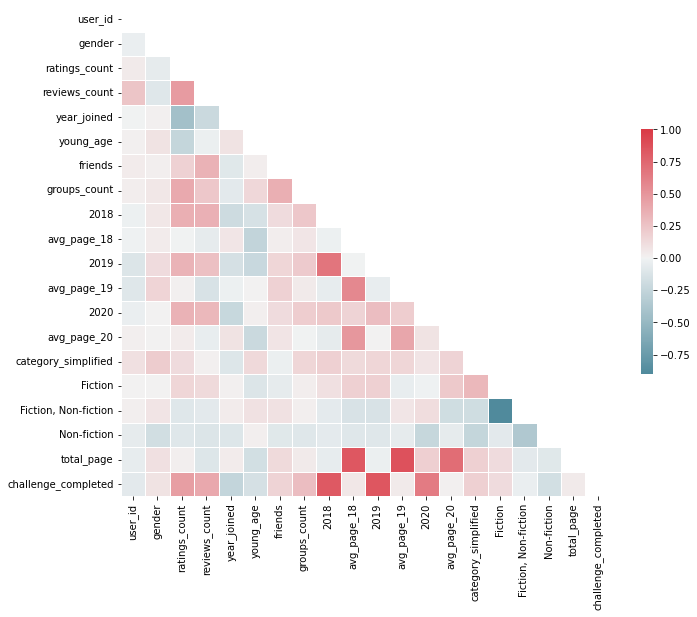

In [3]:
# to visualise the correlation of our data
corr = data.corr()
f, ax =  plt.subplots(figsize= (11,9))

mask = np.triu(np.ones_like(corr, dtype = bool))

cmap = sns.diverging_palette(220, 10, as_cmap= True)

sns.heatmap(corr, mask= mask, cmap= cmap, vmax= 1, center= 0,
            square= True, linewidths= 0.5, cbar_kws= {'shrink': 0.5})

plt.show()

### Are there any correlation between genre preference and completion of challenge?

#### H0: the reader's genre preferences and the completion of challenge are independent

#### H1: the reader's genre preferences and the completion of challenge are dependent

reference: https://machinelearningmastery.com/chi-squared-test-for-machine-learning/

I decided to do the chi-squared test to answer this hypothesis.
The chi2 calculate the expected frequencies for our groups (preferred genre vs how many challenges they completed) then determine whether the observed frequencies matches the expected frequencies. 

The variables are considered independent if the observed and expected frequencies are similar.

In [4]:
# do a crosstab of the variables, this is our observed frequencies
ct = pd.crosstab(data['category'], data['challenge_completed'])
ct

challenge_completed,0,1,2,3
category,,,,
Fiction,2,2,5,7
"Fiction, Non-fiction",16,18,19,28
Non-fiction,2,0,1,0


In [5]:
# the chi2_contigency return the statistic, p-value, degree of freefom and the expected frequencies
stat, pval, dof, expected = st.chi2_contingency(ct)

# this is our expected frequencies
expected

array([[ 3.2 ,  3.2 ,  4.  ,  5.6 ],
       [16.2 , 16.2 , 20.25, 28.35],
       [ 0.6 ,  0.6 ,  0.75,  1.05]])

In [6]:
## ---------- first way --------------

# we will use the probability of 95%
# If the statistic is less than or equal to the critical value, we can fail to reject this assumption, otherwise it can be rejected.
prob = 0.95
critical = st.chi2.ppf(prob, dof)
if stat >= critical:
	print('statistic: ' ,round(stat, 2), '| critical value: ', round(critical, 2))
	print('Dependent (reject H0)')
else:
	print('statistic: ' ,round(stat, 2), '| critical value: ', round(critical, 2))
	print('Independent (fail to reject H0)')


statistic:  6.78 | critical value:  12.59
Independent (fail to reject H0)


In [7]:
## ---------- second way --------------

# interpret p-value
# by comparing it to our significant level (0.5)
alpha = 1.0 - prob
if pval <= alpha:
	print('p-value: ' ,round(pval, 2), '| alpha: ', round(alpha, 2))
	print('Dependent (reject H0)')
else:
	print('p-value: ' ,round(pval, 2), '| alpha: ', round(alpha, 2))
	print('Independent (fail to reject H0)')

p-value:  0.34 | alpha:  0.05
Independent (fail to reject H0)


Conclusion:

Based on our test, we do not reject our null hypothesis and we keep on believing that the genre preferences and the completion of challenges are independent of each other.

----------------

### Are there any correlation between the reader's demographic (age & gender) and their preferred genre?

#### H0: the reader's gender and their genre preference are independent

#### H1: the reader's gender and theit genre preference are dependent

As we are dealing with categorical data, we will also use the chi square test for this.

In [8]:
# do a crosstab of the variables, this is our observed frequencies
# 0 = male, 1 = female
ct = pd.crosstab(data['gender'], data['challenge_completed'])
ct

challenge_completed,0,1,2,3
gender,,,,
0,12,10,11,17
1,8,10,14,18


In [9]:
# the chi2_contigency return the statistic, p-value, degree of freefom and the expected frequencies
stat, pval, dof, expected = st.chi2_contingency(ct)

# this is our expected frequencies
expected

array([[10. , 10. , 12.5, 17.5],
       [10. , 10. , 12.5, 17.5]])

In [10]:
## ---------- first way --------------

# we will use the probability of 95%
# If the statistic is less than or equal to the critical value, we can fail to reject this assumption, otherwise it can be rejected.
prob = 0.95
critical = st.chi2.ppf(prob, dof)
if abs(stat) >= critical:
	print('statistic: ' ,round(stat, 2), '| critical value: ', round(critical, 2))
	print('Dependent (reject H0)')
else:
	print('statistic: ' ,round(stat, 2), '| critical value: ', round(critical, 2))
	print('Independent (fail to reject H0)')

statistic:  1.19 | critical value:  7.81
Independent (fail to reject H0)


In [11]:
## ---------- second way --------------

# interpret p-value
# by comparing it to our significant level (0.5)
alpha = 1.0 - prob
if pval <= alpha:
	print('p-value: ' ,round(pval, 2), '| alpha: ', round(alpha, 2))
	print('Dependent (reject H0)')
else:
	print('p-value: ' ,round(pval, 2), '| alpha: ', round(alpha, 2))
	print('Independent (fail to reject H0)')

p-value:  0.76 | alpha:  0.05
Independent (fail to reject H0)


#### H0: the reader's age and their genre preference are independent

#### H1: the reader's age and theit genre preference are dependent

In [12]:
# do a crosstab of the variables, this is our observed frequencies
# 0 = older reader, 1 = younger reader
ct = pd.crosstab(data['young_age'], data['challenge_completed'])
ct

challenge_completed,0,1,2,3
young_age,,,,
0,6,6,9,17
1,14,14,16,18


In [13]:
# the chi2_contigency return the statistic, p-value, degree of freefom and the expected frequencies
stat, pval, dof, expected = st.chi2_contingency(ct)

# this is our expected frequencies
expected

array([[ 7.6,  7.6,  9.5, 13.3],
       [12.4, 12.4, 15.5, 21.7]])

In [14]:
## ---------- first way --------------

# we will use the probability of 95%
# If the statistic is less than or equal to the critical value, we can fail to reject this assumption, otherwise it can be rejected.
prob = 0.95
critical = st.chi2.ppf(prob, dof)
if abs(stat) >= critical:
	print('statistic: ' ,round(stat, 2), '| critical value: ', round(critical, 2))
	print('Dependent (reject H0)')
else:
	print('statistic: ' ,round(stat, 2), '| critical value: ', round(critical, 2))
	print('Independent (fail to reject H0)')

statistic:  2.79 | critical value:  7.81
Independent (fail to reject H0)


In [15]:
## ---------- second way --------------

# interpret p-value
# by comparing it to our significant level (0.5)
alpha = 1.0 - prob
if pval <= alpha:
	print('p-value: ' ,round(pval, 2), '| alpha: ', round(alpha, 2))
	print('Dependent (reject H0)')
else:
	print('p-value: ' ,round(pval, 2), '| alpha: ', round(alpha, 2))
	print('Independent (fail to reject H0)')

p-value:  0.43 | alpha:  0.05
Independent (fail to reject H0)


Conclusion:

Based on our test, we can conclude that we do not reject the null hypothesis on both of our assumptions. And we can continue to believe that the reader's demographic (age and gender) and their genre preferences are independent.

-----

### Do readers who are more social more likely to complete all the challenges?
I would like to know if readers who use the website/app (goodreads) to socialise with others are more likely to be motivated to complete the challenges. So for this there's 2 ways to measure how social the readers are; by how many groups they join and by how many friends they have.

#### H0: The mean(friends) of readers are equal despite how many challenges they completed
#### H1: The mean(friends) of readers are not equal

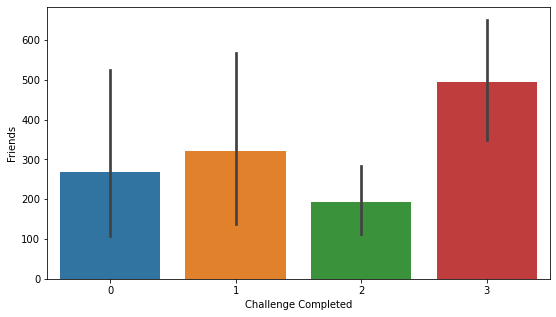

In [16]:
# let's first plot the data in a bar chart to visualise it
plt.figure(figsize= (9,5))
sns.barplot(x = 'challenge_completed', y= 'friends', data=data)
plt.xticks([0,1,2,3])
plt.xlabel('Challenge Completed')
plt.ylabel('Friends')
plt.show()

In [17]:
# ANOVA one way
c3 = data[data['challenge_completed'] == 3]['friends']
c2 = data[data['challenge_completed'] == 2]['friends']
c1 = data[data['challenge_completed'] == 1]['friends']
c0 = data[data['challenge_completed'] == 0]['friends']

stats, pval = st.f_oneway(c0,c1,c2,c3)
alpha = 0.05
if pval <= alpha:
	print('p-value: ' ,round(pval, 2), '| alpha: ', round(alpha, 2))
	print('Dependent (reject H0)')
else:
	print('p-value: ' ,round(pval, 2), '| alpha: ', round(alpha, 2))
	print('Independent (fail to reject H0)')


p-value:  0.07 | alpha:  0.05
Independent (fail to reject H0)


#### H0: The mean(groups) of readers are equal despite how many challenges they completed
#### H1: The mean(groups) of readers are not equal

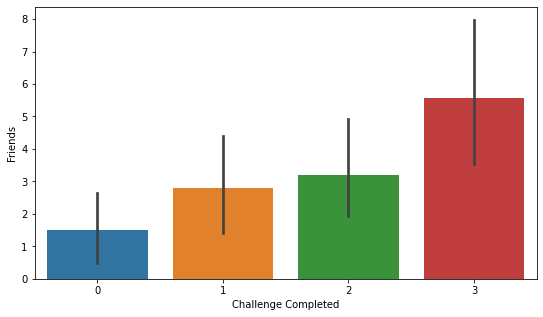

In [18]:
# let's first plot the data in a bar chart to visualise it
plt.figure(figsize= (9,5))
sns.barplot(x = 'challenge_completed', y= 'groups_count', data=data)
plt.xticks([0,1,2,3])
plt.xlabel('Challenge Completed')
plt.ylabel('Friends')
plt.show()

In [19]:
# ANOVA one way
c3 = data[data['challenge_completed'] == 3]['groups_count']
c2 = data[data['challenge_completed'] == 2]['groups_count']
c1 = data[data['challenge_completed'] == 1]['groups_count']
c0 = data[data['challenge_completed'] == 0]['groups_count']

stats, pval = st.f_oneway(c0,c1,c2,c3)
alpha = 0.05
if pval <= alpha:
	print('p-value: ' ,round(pval, 2), '| alpha: ', round(alpha, 2))
	print('Dependent (reject H0)')
else:
	print('p-value: ' ,round(pval, 2), '| alpha: ', round(alpha, 2))
	print('Independent (fail to reject H0)')

p-value:  0.03 | alpha:  0.05
Dependent (reject H0)


#### Conclusion
Based on the tests that we did, it seems that readers that join more groups in the app are more likely to complete the challenge.
However, the same does not apply to the amount of friends a reader have.

#### Assumption check

There are certain assumptions that need to be met in order for the result to be considered valid:
1. Independence -> The observations are obtained independently and randomly from the population 
2. Normality -> The data for each attributes is normally distributed
3. Homogeneity of variance -> The variance among the groups should be approximately equal


In [20]:
# get ANOVA table
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('groups_count ~ C(challenge_completed)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(challenge_completed),241.018571,3.0,3.037924,0.032783
Residual,2538.771429,96.0,NaN,NaN


In [21]:
# test for normality
# H0: The distribution of the sample is not significantly different from a normal distribution
# H1: The distribution of the sample is significantly different from a normal distribution
stats, pvalue = st.shapiro(model.resid)
alpha = 0.05
if pvalue <= alpha:
	print('p-value: ' ,round(pval, 2), '| alpha: ', round(alpha, 2))
	print('Not a normal distribution (reject H0)')
else:
	print('p-value: ' ,round(pval, 2), '| alpha: ', round(alpha, 2))
	print('Normal distribution (fail to reject H0)')

p-value:  0.03 | alpha:  0.05
Not a normal distribution (reject H0)


In [22]:
# Homogeneity of variance
# H0: The groups we're comparing all have equal population variances
# H1: The groups we're comparing do not have equal population variances
stats, pvalue = st.levene(c0, c1, c2, c3)

alpha = 0.05
if pvalue <= alpha:
	print('p-value: ' ,round(pval, 2), '| alpha: ', round(alpha, 2))
	print('Not equal variances (reject H0)')
else:
	print('p-value: ' ,round(pval, 2), '| alpha: ', round(alpha, 2))
	print('Equal variances (fail to reject H0)')


p-value:  0.03 | alpha:  0.05
Equal variances (fail to reject H0)


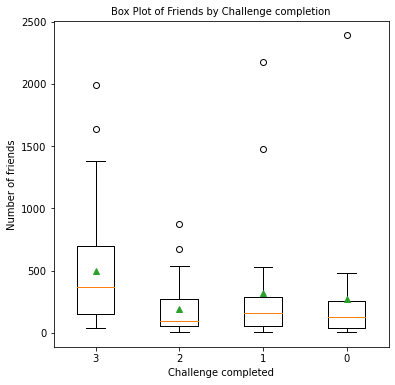

In [23]:
# visually plot the assumption of variance
fig = plt.figure(figsize= (6, 6))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Friends by Challenge completion", fontsize= 10)
ax.set

dataplot = [data['friends'][data['challenge_completed'] == 3],
        data['friends'][data['challenge_completed'] == 2], 
        data['friends'][data['challenge_completed'] == 1],
        data['friends'][data['challenge_completed'] == 0]]

ax.boxplot(dataplot,
           labels= ['3', '2', '1', '0'],
           showmeans= True)

plt.ylabel("Number of friends")
plt.xlabel("Challenge completed")

plt.show()

#### Conclusion:
1. Independence -> The data is collected from random users in the website Goodreads, and each data point is an independent user that does not affect one another.
2. Normality -> From testing the assumption of normality using the Shapiro-Wilk test, the data is not normally distributed.
3. Homogeneity of variance -> From testing the assumption of homogeneity of variance using the Levene test, the data variances are equal.

Notes:

*If the measurement variable is not normally distributed, it may increasr the chance of a false positive result. Fortunately, anova is not very sensitive to moderate deviations from normality; simulation studies, using a variety of non-normal distributions, have shown that the false positive rate is not affected very much by this violation of the assumption (Glass et al. 1972, Harwell et al. 1992, Lix et al. 1996).*

-----------------

### Do readers who prefer fiction books read more pages on average?

I have a hypothesis that people who prefer fiction books reads more pages on average than those who mostly reads non-fiction books, as from experience reading a long fiction book is more fun than reading a long non-fiction book. So let's prove if my assumption is correct or not :)

#### H0: The mean(page) of readers who prefer fiction books <= The mean(page) of readers who prefer non-fiction books

#### H1: The mean(page) of readers who prefer fiction books > The mean(page) of readers who prefer non-fiction books

In [24]:
# readers who prefer fiction books
fic = data[data['category_simplified'] == 1]['total_page']
# readers who prefer non-fiction books
nonfic = data[data['category_simplified'] == 0]['total_page']

In [25]:
alpha = 0.05
alpha = 1.0 - prob

stat, p_value = st.ttest_ind(fic, nonfic, equal_var=False, alternative= 'greater')

if pval <= alpha:
	print('p-value: ' ,round(pval, 2), '| alpha: ', round(alpha, 2))
	print('Dependent (reject H0)')
else:
	print('p-value: ' ,round(pval, 2), '| alpha: ', round(alpha, 2))
	print('Independent (fail to reject H0)')

p-value:  0.03 | alpha:  0.05
Dependent (reject H0)


#### Conclusion
According to the test results, my hypothesis is correct and we can reject the null hypothesis with the confidence level of 95%.
It seems that readers who prefer to read fiction books are more likely to read more pages in average than those who prefer to read non-fiction books.



-----

### Do readers who used the app more actively more likely to complete all the challenges?
I would like to know if the readers who use the website/app (goodreads) more actively are more likely to be motivated to complete the challenges. So for this I decided 2 ways to measure how active a user are; by how many books they rate and how many reviews they leave.

#### H0: The mean(ratings count) of readers are equal despite how many challenges they completed
#### H1: The mean(ratings count) of readers are not equal

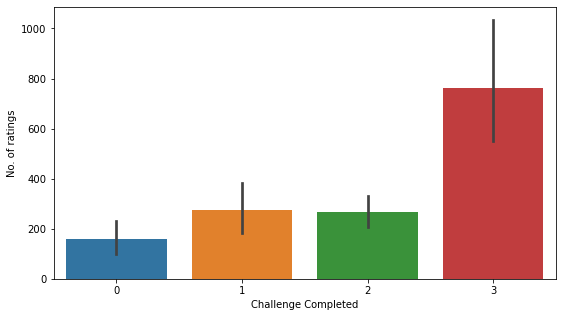

In [26]:
# let's first plot the data in a bar chart to visualise it
plt.figure(figsize= (9,5))
sns.barplot(x = 'challenge_completed', y= 'ratings_count', data=data)
plt.xticks([0,1,2,3])
plt.xlabel('Challenge Completed')
plt.ylabel('No. of ratings')
plt.show()

In [27]:
# ANOVA one way
c3 = data[data['challenge_completed'] == 3]['ratings_count']
c2 = data[data['challenge_completed'] == 2]['ratings_count']
c1 = data[data['challenge_completed'] == 1]['ratings_count']
c0 = data[data['challenge_completed'] == 0]['ratings_count']

stats, pval = st.f_oneway(c0,c1,c2,c3)
alpha = 0.05
if pval <= alpha:
	print('p-value: ' ,round(pval, 2), '| alpha: ', round(alpha, 2))
	print('Dependent (reject H0)')
else:
	print('p-value: ' ,round(pval, 2), '| alpha: ', round(alpha, 2))
	print('Independent (fail to reject H0)')

p-value:  0.0 | alpha:  0.05
Dependent (reject H0)


#### H0: The mean(reviews count) of readers are equal despite how many challenges they completed
#### H1: The mean(reviews count) of readers are not equal

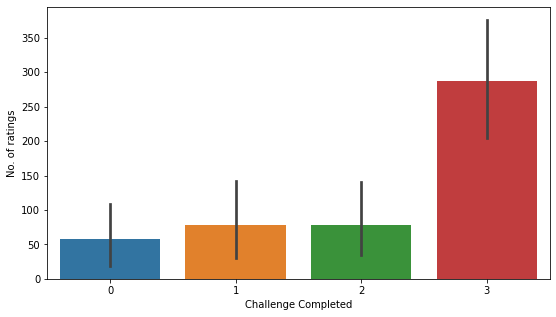

In [28]:
# let's first plot the data in a bar chart to visualise it
plt.figure(figsize= (9,5))
sns.barplot(x = 'challenge_completed', y= 'reviews_count', data=data)
plt.xticks([0,1,2,3])
plt.xlabel('Challenge Completed')
plt.ylabel('No. of ratings')
plt.show()

In [29]:
# ANOVA one way
c3 = data[data['challenge_completed'] == 3]['reviews_count']
c2 = data[data['challenge_completed'] == 2]['reviews_count']
c1 = data[data['challenge_completed'] == 1]['reviews_count']
c0 = data[data['challenge_completed'] == 0]['reviews_count']

stats, pval = st.f_oneway(c0,c1,c2,c3)
alpha = 0.05
if pval <= alpha:
	print('p-value: ' ,round(pval, 2), '| alpha: ', round(alpha, 2))
	print('Dependent (reject H0)')
else:
	print('p-value: ' ,round(pval, 2), '| alpha: ', round(alpha, 2))
	print('Independent (fail to reject H0)')

p-value:  0.0 | alpha:  0.05
Dependent (reject H0)


#### Conclusion
Based on the tests that is done, it seems that readers that leave more ratings or reviews are more likely to complete the challenge.